<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Virus_Types_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 124 (delta 5), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (124/124), 37.66 MiB | 30.61 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import os
path = os.listdir('/content/drive/MyDrive/Data/M_Data')
classes = {'PSTV foliar symptoms':0, 'Rugose mosaic symptom':1}

In [20]:
import cv2
import os

# Define the classes and their respective labels
 

img_no = 1
x = []
y = []
z = []
histo = []

for cls in classes:
    pth = '/content/drive/MyDrive/Data/Preproc/' + cls
    os.makedirs(pth, exist_ok=True)  # Create class directory if it doesn't exist
    for j in os.listdir('/content/drive/MyDrive/Data/M_Data/' + cls):
        realimage = cv2.imread('/content/drive/MyDrive/Data/M_Data/' + cls + '/' + j, 1)
        
        # Resize
        resizedImage = cv2.resize(realimage, (800, 600))
        
        # Contrast improve
        color_contrastImage = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB)
        
        # Histogram equalization
        hist_eq_image = cv2.cvtColor(color_contrastImage, cv2.COLOR_RGB2Lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        hist_eq_image[:, :, 0] = clahe.apply(hist_eq_image[:, :, 0])
        hist_eq_image = cv2.cvtColor(hist_eq_image, cv2.COLOR_Lab2RGB)
        
        # Gamma correction
        gamma = 1.5
        gamma_corrected = cv2.pow(hist_eq_image/255.0, gamma)
        gamma_corrected = (gamma_corrected * 255).astype('uint8')
        
        # Smooth image
        smooth_image = cv2.GaussianBlur(gamma_corrected, (7, 7), 0, borderType=cv2.BORDER_CONSTANT)
        
        # Save the preprocessed image in the class directory
        # cv2.imwrite(pth + '/' + str(img_no) + '.jpg', smooth_image)
        
        # Append modified images to the respective lists
        img_no += 1
        x.append(smooth_image)
        y.append(classes[cls])
        z.append(realimage)


        

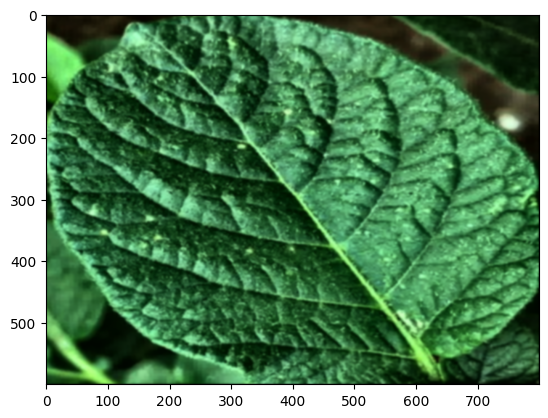

In [18]:
plt.imshow(x[100]) 

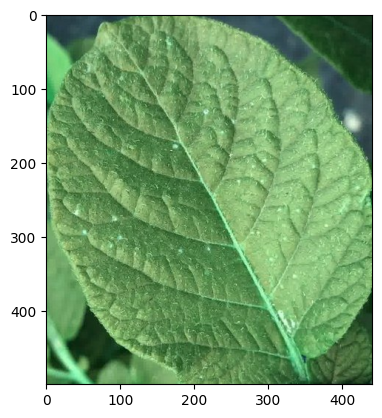

In [19]:
plt.imshow(z[100])  

In [20]:
len(x)

440

In [25]:
import os
import cv2
from skimage import img_as_ubyte

# Define the input folder path and output folder path
input_folder = "/content/drive/MyDrive/Data/Preproc"
output_folder = "/content/drive/MyDrive/Data/Processed"

# Define the classes
 

# Iterate over the classes
for class_name in classes:
    # Create a folder for the current class in the output directory
    class_output_folder = os.path.join(output_folder, class_name)
    os.makedirs(class_output_folder, exist_ok=True)

    # Get the image filenames for the current class
    class_folder = os.path.join(input_folder, class_name)
    image_filenames = os.listdir(class_folder)

    # Process and save images
    for image_filename in image_filenames:
        image_path = os.path.join(class_folder, image_filename)

        # Read the image
        img = cv2.imread(image_path)

        # Perform image processing operations
        new_img = img_as_ubyte(img)
        bg_rem_img = remove(new_img)  # Replace 'remove' with your own background removal function
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)

        # Save the preprocessed image in the class directory
        output_path = os.path.join(class_output_folder, image_filename)
        cv2.imwrite(output_path, bg_rem_img_BGR)


In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data_path = '/content/drive/MyDrive/Data/Processed'

# Create empty lists for images and corresponding labels
images = []
labels = []

# Iterate through each class folder in the data path
for class_name in os.listdir(data_path):
    class_folder = os.path.join(data_path, class_name)
    if os.path.isdir(class_folder):
        # Assign a numerical label to each class
        label = 0 if class_name == 'PSTV foliar symptoms' else 1

        # Iterate through each image file in the class folder
        for image_name in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_name)

            # Read the image using OpenCV
            image = cv2.imread(image_path)

            # Preprocess the image if necessary (e.g., resize, normalize, etc.)
            # ...

            # Flatten the image to a one-dimensional array
            flattened_image = image.flatten()

            # Append the flattened image and label to the respective lists
            images.append(flattened_image)
            labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Initialize the KNN classifier with the desired number of neighbors (e.g., 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier using the training data
knn.fit(X_train, y_train)

# Use the trained classifier to make predictions on the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9431818181818182


In [2]:
# Save the trained model to Google Drive
import joblib

# Save the trained model to Google Drive
joblib.dump(knn, '/content/drive/MyDrive/Data/model/knn_model.pkl')

['/content/drive/MyDrive/Data/model/knn_model.pkl']

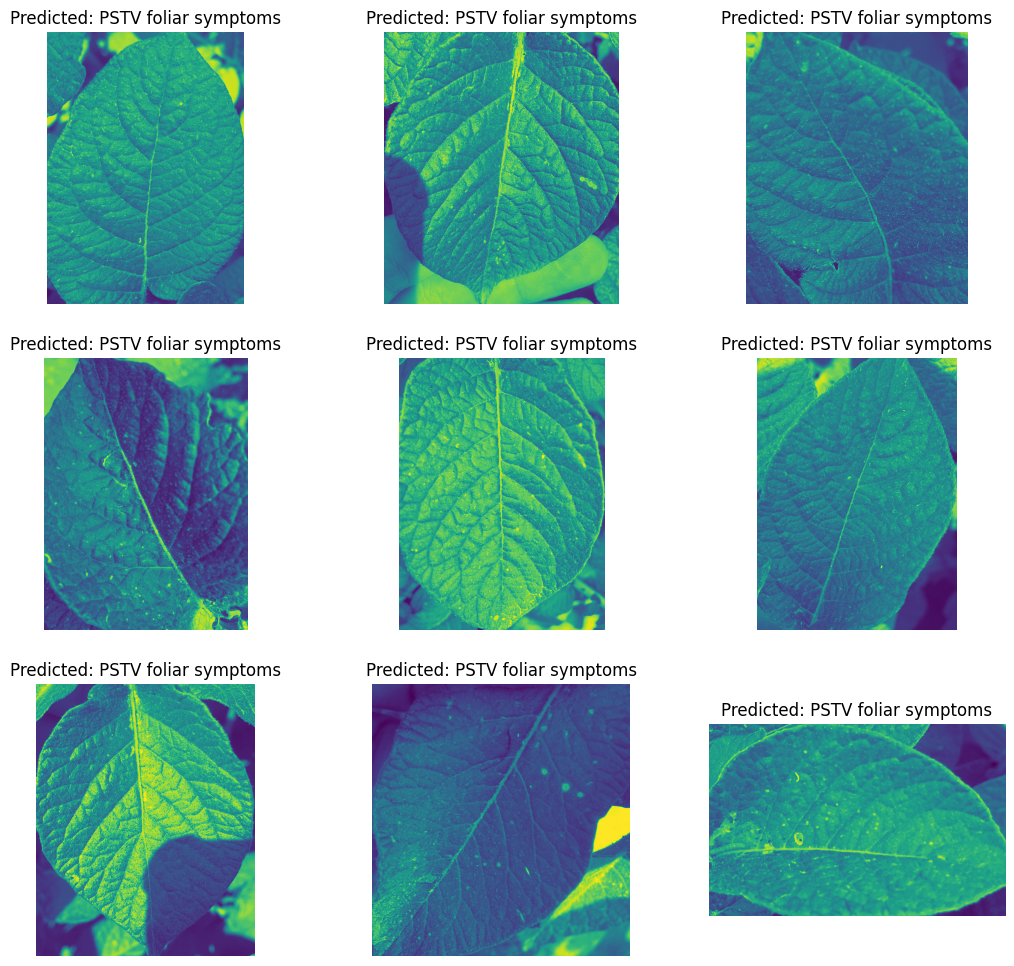

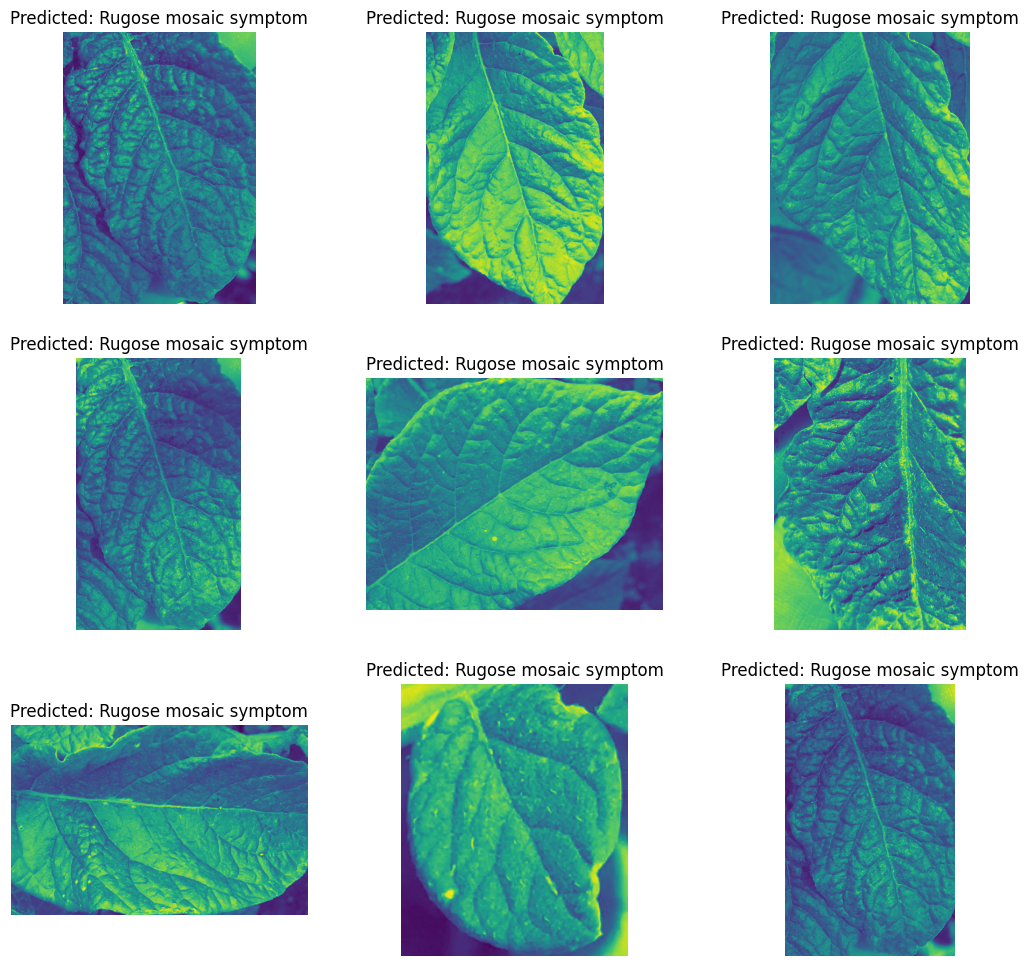

In [4]:
import joblib
import cv2
import os
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Data/model/knn_model.pkl')

# Define the class names
class_names_pstv = ['PSTV foliar symptoms', 'Rugose mosaic symptom']
class_names_rugose = ['Rugose mosaic symptom', 'PSTV foliar symptoms']

# Testing for PSTV foliar symptoms class
plt.figure(figsize=(13, 12))
c = 1

for i in os.listdir('/content/drive/MyDrive/Data/M_Data/PSTV foliar symptoms/')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('/content/drive/MyDrive/Data/M_Data/PSTV foliar symptoms/' + i, 0)
    img1 = cv2.resize(img, (1200, 1200))
    img2 = img1.reshape(1, -1) / 255
    
    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names_pstv[pred[0]]  # Use the correct class names
    
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1

plt.show()

# Testing for Rugose mosaic symptom class
plt.figure(figsize=(13, 12))
c = 1

for i in os.listdir('/content/drive/MyDrive/Data/M_Data/Rugose mosaic symptom/')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('/content/drive/MyDrive/Data/M_Data/Rugose mosaic symptom/' + i, 0)
    img1 = cv2.resize(img, (1200, 1200))
    img2 = img1.reshape(1, -1) / 255

    # Make a prediction on the image
    pred = model.predict(img2)
    pred_class_name = class_names_rugose[pred[0]]  # Use the correct class names
    
    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    
    c += 1

plt.show()


In [7]:
!pip install flask



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pickle
from flask import Flask, request, jsonify
from PIL import Image
import numpy as np


In [11]:
import pickle

# Load the original model
original_model = ...

# Repickle the model
new_model_path = '/content/drive/MyDrive/Data/model/new_knn_model.pkl'
with open(new_model_path, 'wb') as file:
    pickle.dump(original_model, file)



In [12]:
model_path = '/content/drive/MyDrive/Data/model/new_knn_model.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)


In [13]:
app = Flask(__name__)


In [14]:
@app.route('/classify', methods=['POST'])
def classify():
    image_file = request.files['image']
    # Perform image processing and feature extraction
    # Pass the processed features through the model for classification
    # Return the predicted disease type
    return jsonify({'disease_type': predicted_disease})


In [16]:
if __name__ == '__main__':
    app.run()
